In [129]:
#importing necessary libraries
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import glob
from glob import glob
from pathlib import Path
from sklearn import *
import numpy as np
import pandas as pd
import seaborn as sns
import math

In [2]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#MildDemented
for i in range(1,32):
  im1 = Image.open(r'/content/drive/MyDrive/archive (1)/Alzheimer_s Dataset/GanFinal/NonDemented/NonDemented{}.png'.format(i))
  im1=im1.convert('RGB')
  crp = (49, 43, 321, 315)
  im1 = im1.crop(crp)
  im1.save(r'/content/drive/MyDrive/archive (1)/Alzheimer_s Dataset/GF/NonDemented/NonDemented{}.jpg'.format(i))

In [90]:
#MildDemented
for i in range(1,33):
  im1 = Image.open(r'/content/drive/MyDrive/archive (1)/Alzheimer_s Dataset/GanFinal/MildDemented/mild{}.png'.format(i))
  im1=im1.convert('RGB')
  crp = (49, 43, 321, 315)
  im1 = im1.crop(crp)
  im1.save(r'/content/drive/MyDrive/archive (1)/Alzheimer_s Dataset/GF/MildDemented/mild{}.jpg'.format(i))

In [91]:
#ModerateDemented
for i in range(1,33):
  im1 = Image.open(r'/content/drive/MyDrive/archive (1)/Alzheimer_s Dataset/GanFinal/ModerateDemented/Moderate{}.png'.format(i))
  im1=im1.convert('RGB')
  crp = (49, 43, 321, 315)
  im1 = im1.crop(crp)
  im1.save(r'/content/drive/MyDrive/archive (1)/Alzheimer_s Dataset/GF/ModerateDemented/moderate{}.jpg'.format(i))

In [109]:
#VeryMildDemented
for i in range(1,32):
  im1 = Image.open(r'/content/drive/MyDrive/archive (1)/Alzheimer_s Dataset/GanFinal/VeryMildDemented/vmild{}.png'.format(i))
  im1=im1.convert('RGB')
  crp = (49, 43, 321, 315)
  im1 = im1.crop(crp)
  im1.save(r'/content/drive/MyDrive/archive (1)/Alzheimer_s Dataset/GF/VeryMildDemented/vmild{}.jpg'.format(i))

In [120]:
#DATASET CREATION
dataset_path = Path('/content/drive/MyDrive/archive (1)/Alzheimer_s Dataset/GF')
images_link = list(dataset_path.glob(r'**/*.jpg'))
images_l = [x.parents[0].stem for x in images_link]
images_folder=[x.parents[1].stem for x in images_link]
images_labels=preprocessing.LabelEncoder().fit_transform(images_l)
df=pd.DataFrame()
df['Link']=images_link
df['label']=images_l
df['Label_Int']=images_labels

In [121]:
df

,Link,label,Label_Int
0,/content/drive/MyDrive/archive (1)/Alzheimer_s...,MildDemented,0
1,/content/drive/MyDrive/archive (1)/Alzheimer_s...,MildDemented,0
2,/content/drive/MyDrive/archive (1)/Alzheimer_s...,MildDemented,0
3,/content/drive/MyDrive/archive (1)/Alzheimer_s...,MildDemented,0
4,/content/drive/MyDrive/archive (1)/Alzheimer_s...,MildDemented,0
...,...,...,...
121,/content/drive/MyDrive/archive (1)/Alzheimer_s...,VeryMildDemented,3
122,/content/drive/MyDrive/archive (1)/Alzheimer_s...,VeryMildDemented,3
123,/content/drive/MyDrive/archive (1)/Alzheimer_s...,VeryMildDemented,3
124,/content/drive/MyDrive/archive (1)/Alzheimer_s...,VeryMildDemented,3


In [112]:
df_MildDemented = df[df['label'] == 'MildDemented']
df_MildDemented_link = df_MildDemented['Link']

In [113]:
df_ModerateDemented = df[df['label'] == 'ModerateDemented']
df_ModerateDemented_link = df_ModerateDemented['Link']

In [114]:
df_VeryMildDemented = df[df['label'] == 'VeryMildDemented']
df_VeryMildDemented_link = df_VeryMildDemented['Link']

In [122]:
df_NonDemented = df[df['label'] == 'NonDemented']
df_NonDemented_link = df_NonDemented['Link']

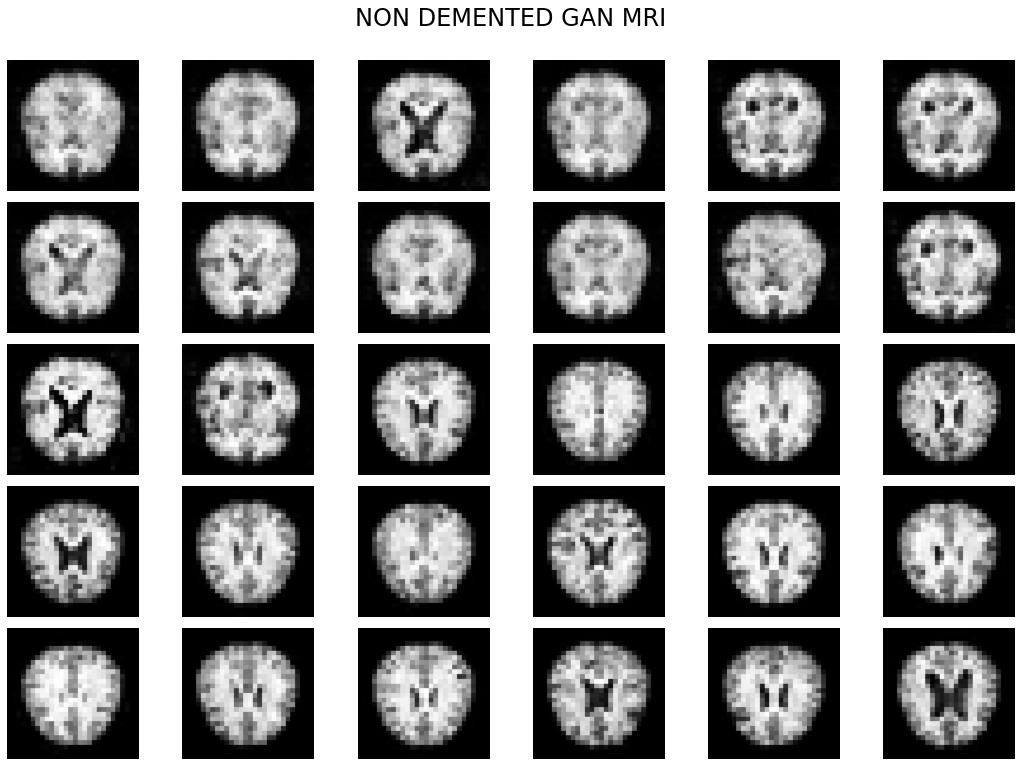

In [126]:
#Visualizing Data
#NonDemented
fig, ax = plt.subplots(figsize=(15, 10))
fig.suptitle('NON DEMENTED GAN MRI', fontsize=24, y=1.06)

for ind, img_src in enumerate(df_NonDemented_link[1:31]):
    plt.subplot(5, 6, ind+1)
    img = plt.imread(img_src)
    plt.axis('off')
    plt.tight_layout()
    plt.imshow(img)

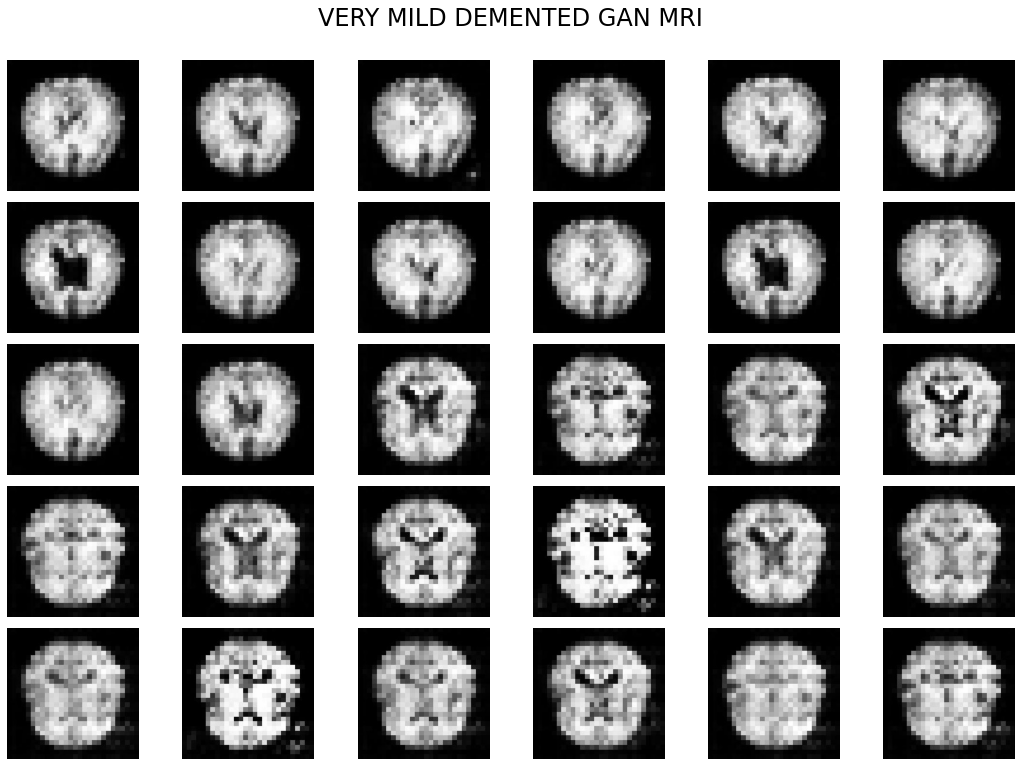

In [117]:
#VeryMildDemented
fig, ax = plt.subplots(figsize=(15, 10))
fig.suptitle('VERY MILD DEMENTED GAN MRI', fontsize=24, y=1.06)

for ind, img_src in enumerate(df_VeryMildDemented_link[1:31]):
    plt.subplot(5, 6, ind+1)
    img = plt.imread(img_src)
    plt.axis('off')
    plt.tight_layout()
    plt.imshow(img)

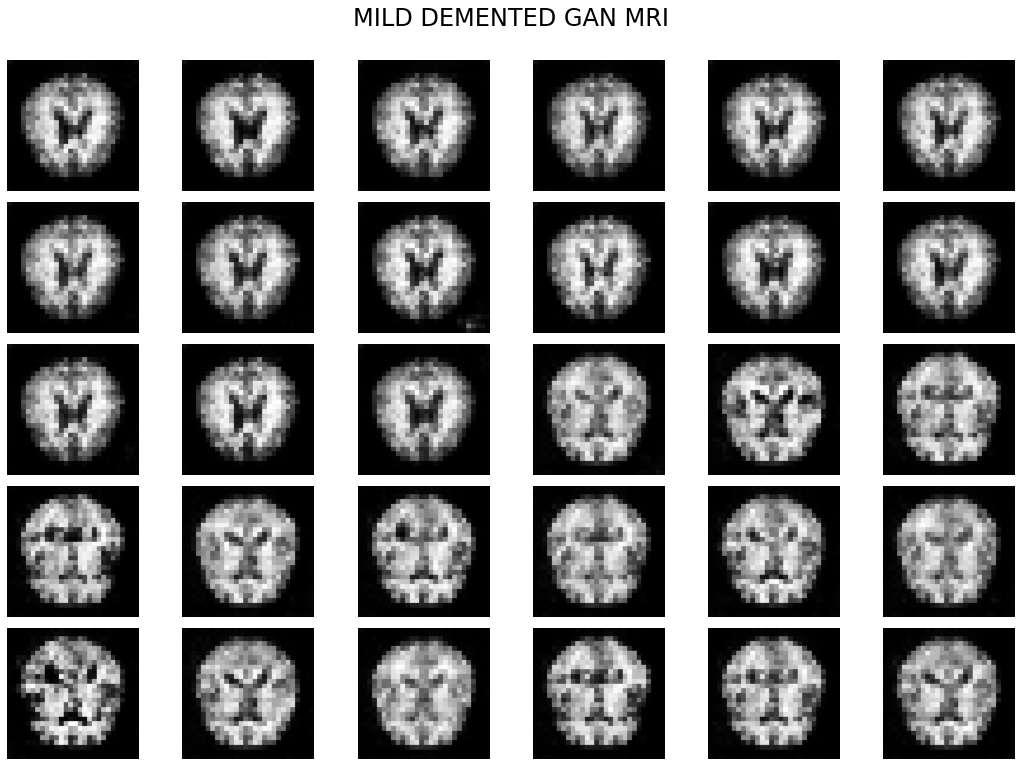

In [116]:
#MildDemented
fig, ax = plt.subplots(figsize=(15, 10))
fig.suptitle('MILD DEMENTED GAN MRI', fontsize=24, y=1.06)

for ind, img_src in enumerate(df_MildDemented_link[1:31]):
    plt.subplot(5, 6, ind+1)
    img = plt.imread(img_src)
    plt.axis('off')
    plt.tight_layout()
    plt.imshow(img)

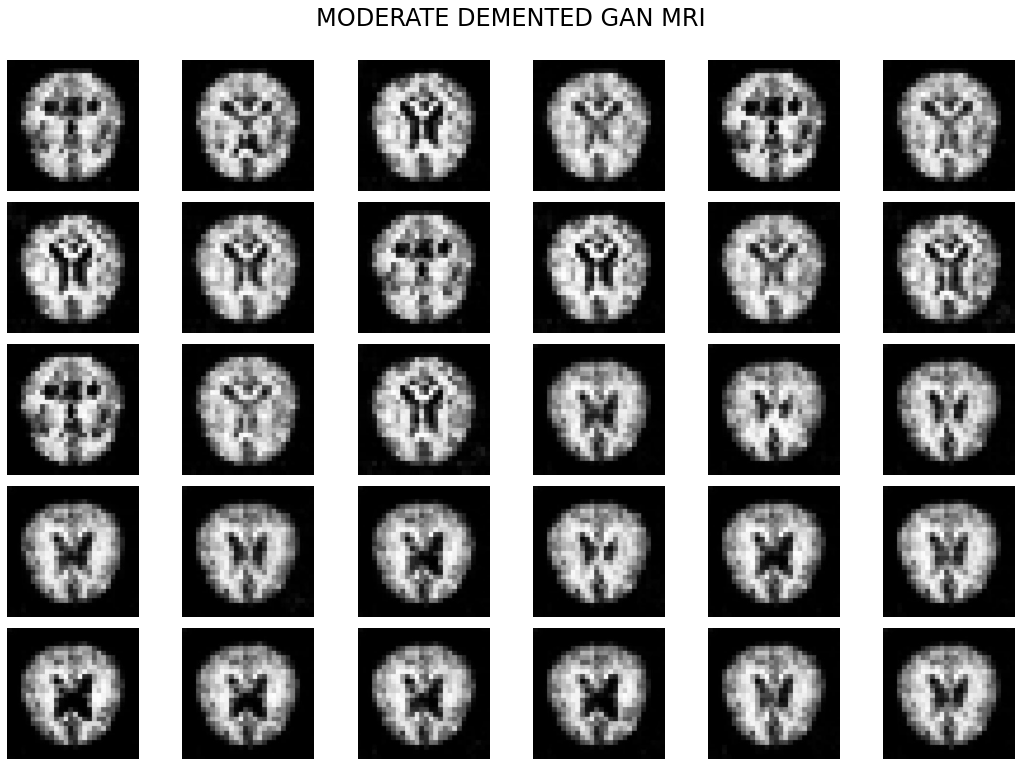

In [118]:
#MildDemented
fig, ax = plt.subplots(figsize=(15, 10))
fig.suptitle('MODERATE DEMENTED GAN MRI', fontsize=24, y=1.06)

for ind, img_src in enumerate(df_ModerateDemented_link[1:31]):
    plt.subplot(5, 6, ind+1)
    img = plt.imread(img_src)
    plt.axis('off')
    plt.tight_layout()
    plt.imshow(img)

In [127]:
#accessing images
data = glob('/content/drive/MyDrive/archive (1)/Alzheimer_s Dataset/**/*.jpg', recursive=True)
print('No. of Images in the directory ', len(data))

No. of Images in the directory  6526


In [131]:
#samples in each directory
MildDemented=glob('/content/drive/MyDrive/archive (1)/Alzheimer_s Dataset/**/MildDemented/*.jpg', recursive=True)
ModerateDemented=glob('/content/drive/MyDrive/archive (1)/Alzheimer_s Dataset/**/ModerateDemented/*.jpg', recursive=True)
NonDemented=glob('/content/drive/MyDrive/archive (1)/Alzheimer_s Dataset/**/NonDemented/*.jpg', recursive=True)
VeryMildDemented=glob('/content/drive/MyDrive/archive (1)/Alzheimer_s Dataset/**/VeryMildDemented/*.jpg', recursive=True)

print('No. of files in the directory Mild Demented:', len(MildDemented))
print('No. of files in the directory Moderate Demented:', len(ModerateDemented))
print('No. of files in the directory Non Demented:', len(NonDemented))
print('No. of files in the directory Very Mild Demented:', len(VeryMildDemented))

No. of files in the directory Mild Demented: 928
No. of files in the directory Moderate Demented: 96
No. of files in the directory Non Demented: 3231
No. of files in the directory Very Mild Demented: 2271


# **CNN WITHOUT PREPROCESSING**

In [132]:
import shutil
import matplotlib.pyplot as plt
from sklearn.utils import resample
import numpy as np 
import pandas as pd 
import os 
from os import listdir
import keras
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
from sklearn.metrics import accuracy_score
%matplotlib inline
import glob
from PIL import Image
from tensorflow.keras.callbacks import EarlyStopping, Callback , ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import precision_recall_curve, roc_curve, accuracy_score, confusion_matrix, precision_score, recall_score
import keras.utils as image

In [133]:
Imagedata = pd.DataFrame(index=np.arange(0, len(MildDemented)+len(ModerateDemented)+len(NonDemented)+len(VeryMildDemented)), columns=["image", "target"])
k=0
for c in [0,1,2,3]:
        if c==0:
            for m in range(len(MildDemented)):
                Imagedata.iloc[k]["image"] = MildDemented[m]
                Imagedata.iloc[k]["target"] = 0
                k += 1
        elif c==1:
            for m in range(len(ModerateDemented)):
                Imagedata.iloc[k]["image"] = ModerateDemented[m]
                Imagedata.iloc[k]["target"] = 1
                k += 1
        elif c==2:
             for m in range(len(NonDemented)):
                Imagedata.iloc[k]["image"] = NonDemented[m]
                Imagedata.iloc[k]["target"] = 2
                k += 1
        else:
          for m in range(len(VeryMildDemented)):
            Imagedata.iloc[k]["image"]=VeryMildDemented[m]
            Imagedata.iloc[k]["target"]=3
            k +=1
        

In [134]:
train_image = []
y = []

for i in tqdm(range(Imagedata.shape[0])):
    img = image.load_img(Imagedata['image'].iloc[i], target_size=(75,75,1), grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)

        
X = np.array(train_image)
y = Imagedata.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, random_state=42, test_size=0.2 , shuffle=True)

Y_train = np_utils.to_categorical(y_train, 4)
Y_test = np_utils.to_categorical(y_test, 4)
Y_val = np_utils.to_categorical(y_val, 4)

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

100%|██████████| 6526/6526 [45:57<00:00,  2.37it/s]


(5220, 75, 75, 3)
(1044, 75, 75, 3)
(262, 75, 75, 3)


In [135]:
model = Sequential()

model.add(Conv2D(filters =32, kernel_size = (3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(75,75,3)))
model.add(MaxPool2D(pool_size=(1,1)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'valid',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Flatten())  
model.add(Dense(256, activation = 'relu'))
model.add(Dense(150, activation='relu'))  
model.add(Dense(4, activation='softmax')) 
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

history = model.fit(X_train, Y_train, batch_size=10, epochs = 25, validation_data=(X_val, Y_val))

Epoch 1/25
522/522 [==============================] - 219s 417ms/step - loss: 1.0403 - accuracy: 0.5033 - val_loss: 0.9813 - val_accuracy: 0.5344
Epoch 2/25
522/522 [==============================] - 222s 425ms/step - loss: 0.9093 - accuracy: 0.5764 - val_loss: 0.8908 - val_accuracy: 0.6145
Epoch 3/25
522/522 [==============================] - 217s 417ms/step - loss: 0.8241 - accuracy: 0.6257 - val_loss: 0.7514 - val_accuracy: 0.6527
Epoch 4/25
522/522 [==============================] - 213s 408ms/step - loss: 0.7353 - accuracy: 0.6690 - val_loss: 0.7022 - val_accuracy: 0.6794
Epoch 5/25
522/522 [==============================] - 217s 415ms/step - loss: 0.6050 - accuracy: 0.7310 - val_loss: 0.5086 - val_accuracy: 0.7519
Epoch 6/25
522/522 [==============================] - 216s 414ms/step - loss: 0.4868 - accuracy: 0.7923 - val_loss: 0.4851 - val_accuracy: 0.7824
Epoch 7/25
522/522 [==============================] - 219s 420ms/step - loss: 0.3822 - accuracy: 0.8439 - val_loss: 0.3402 -

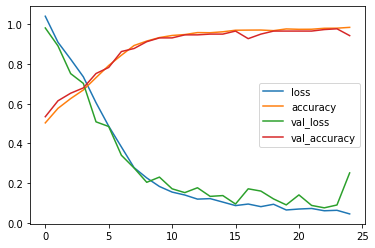

In [136]:
history_df = pd.DataFrame(history.history)
history_df.plot()

In [137]:
model.evaluate(X_test, Y_test)

33/33 [==============================] - 10s 304ms/step - loss: 0.1616 - accuracy: 0.9617


[0.16156107187271118, 0.961685836315155]

In [144]:
pred = model.predict(X_test)

33/33 [==============================] - 11s 338ms/step


In [145]:
print('Model Accuracy score', accuracy_score(np.argmax(pred, axis=1), np.argmax(Y_test, axis=1)))

Model Accuracy score 0.9616858237547893


In [146]:
preds = np.argmax(pred, axis=1)
actual_label = np.argmax(Y_test, axis=1)
print(classification_report(actual_label, preds))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       162
           1       1.00      1.00      1.00         7
           2       0.94      0.99      0.97       531
           3       0.98      0.92      0.95       344

    accuracy                           0.96      1044
   macro avg       0.98      0.97      0.97      1044
weighted avg       0.96      0.96      0.96      1044



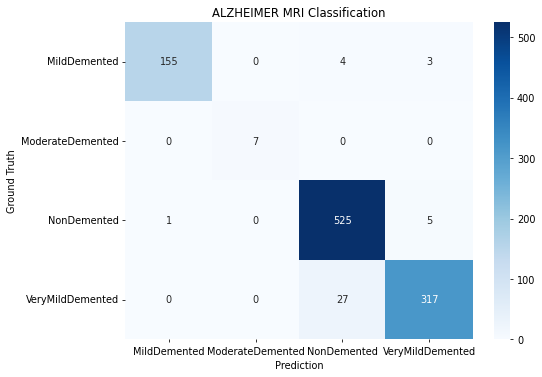

In [142]:
labels=['MildDemented','ModerateDemented','NonDemented','VeryMildDemented']
cnf = confusion_matrix(actual_label, preds)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')
ax = sns.heatmap(cnf, cmap='Blues', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.title('ALZHEIMER MRI Classification')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show(ax)

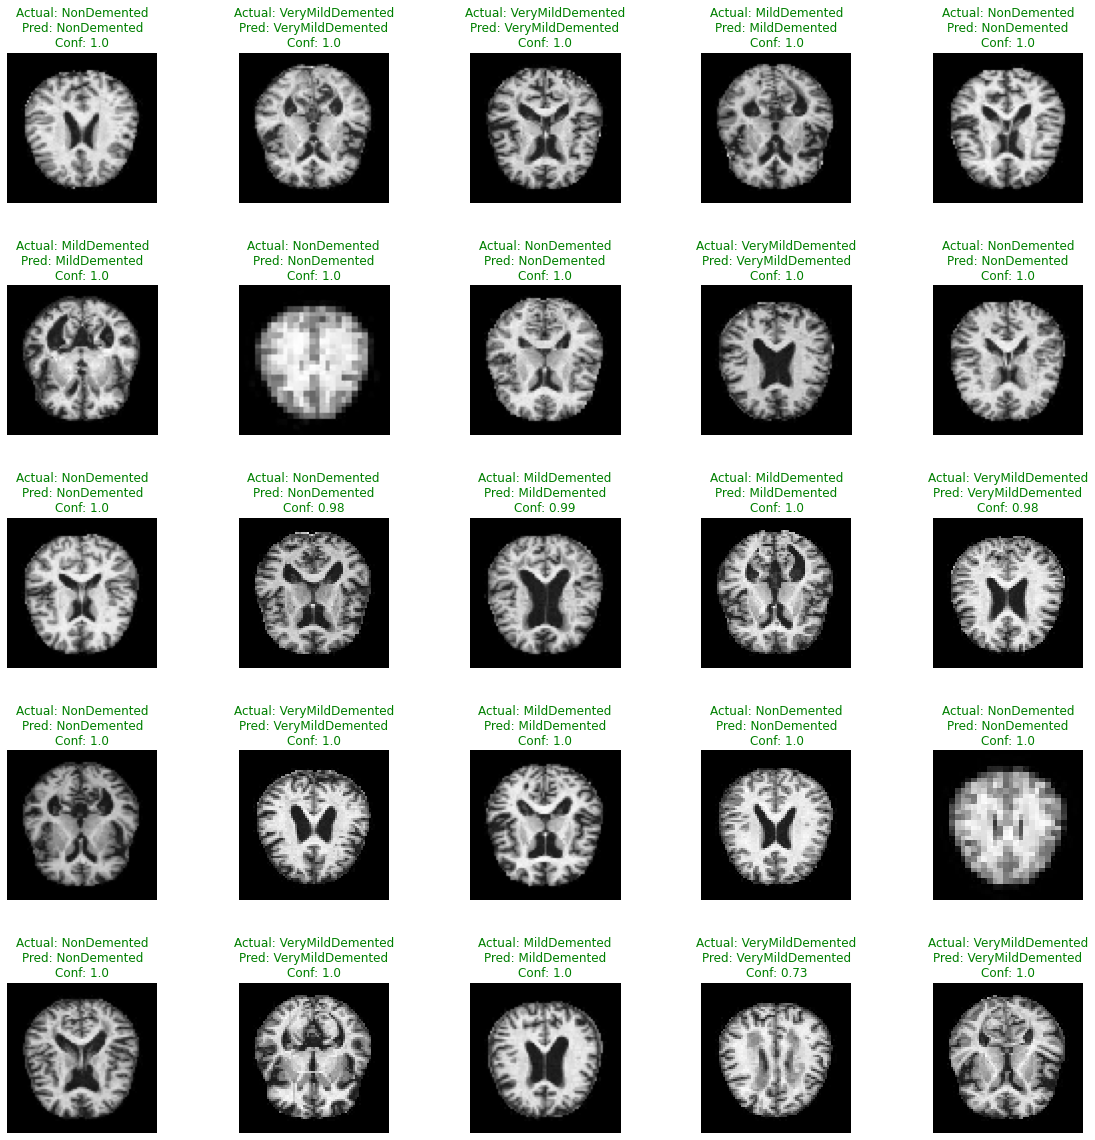

In [143]:
grid_width = 5
grid_height = 5
f, ax = plt.subplots(grid_width, grid_height)
f.set_size_inches(15, 15)

img_idx = 0
for i in range(0, grid_width):
    for j in range(0, grid_height):
        actual = actual_label[img_idx]
        predicted = preds[img_idx]
        confidence = round(pred[img_idx][predicted], 2)
        ax[i][j].axis('off')
        if(labels[actual]==labels[predicted]):
           ax[i][j].set_title('Actual: '+labels[actual]+'\nPred: '+labels[predicted] + '\nConf: ' +str(confidence),color='green')
        else:
          ax[i][j].set_title('Actual: '+labels[actual]+'\nPred: '+labels[predicted] + '\nConf: ' +str(confidence),color='red')
        
        ax[i][j].imshow(X_test[img_idx])
        img_idx += 1

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.5, hspace=0.55) 